In [1]:
#Importing Necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
app_data=pd.read_csv("application_data.csv")
pvs_data=pd.read_csv("previous_application.csv")

In [3]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
app_data.shape

(307511, 122)

In [5]:
#percentage of missing values in application data
appnull=100*app_data.isnull().mean().sort_values(ascending=False)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(appnull)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [6]:
#Data having percentage of missing value greater than 50 are dropped
appnull_50 = appnull[appnull>50]
appnull_50

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
FLOORSMIN_AVG               67.848630
FLOORSMIN_MODE              67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_AVG             66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MEDI               59.376738
LANDAREA_MODE               59.376738
LANDAREA_AVG                59.376738
BASEMENTAREA_MEDI           58.515956
BASEMENTAREA_AVG            58.515956
BASEMENTAREA_MODE           58.515956
EXT_SOURCE_1                56.381073
NONLIVINGAREA_MODE          55.179164
NONLIVINGAREA_AVG           55.179164
NONLIVINGARE

In [7]:
len(appnull_50)

41

In [8]:
app_data.drop(columns=appnull_50.index,axis=1,inplace = True)

In [9]:
appnull=100*app_data.isnull().mean().sort_values(ascending=False)
appnull

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [10]:
appnull_40 = appnull[appnull>40]
appnull_40

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
dtype: float64

In [11]:
#Data having percentage of missing value greater than 40 are dropped
app_data.drop(columns=appnull_40.index,axis=1,inplace = True)

In [12]:
appnull1=100*app_data.isnull().mean().sort_values(ascending=False)
appnull1

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

In [13]:
app_data.shape

(307511, 73)

In [14]:
#unnecessary columns are dropped
app_data.drop(["EXT_SOURCE_3",'AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT'],axis=1,inplace=True)

In [15]:
app_data.drop(['AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','NAME_TYPE_SUITE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','EXT_SOURCE_2','AMT_ANNUITY','DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_21','FLAG_DOCUMENT_20','FLAG_DOCUMENT_19','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_16','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_12','LIVE_CITY_NOT_WORK_CITY','DAYS_REGISTRATION','REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH','REG_CITY_NOT_WORK_CITY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','NAME_CONTRACT_TYPE'],axis=1,inplace=True)

In [16]:
app_data.shape

(307511, 19)

In [17]:
pvs_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [18]:
pvs_data.shape

(1670214, 37)

In [19]:
#percentage of missing values in previous application data
pvsnull=100*pvs_data.isnull().mean().sort_values(ascending=False)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(pvsnull)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [20]:
#Data having percentage of missing value greater than 50 are dropped
pvsnull_50 = pvsnull[pvsnull>50]
pvsnull_50

RATE_INTEREST_PRIVILEGED    99.643698
RATE_INTEREST_PRIMARY       99.643698
AMT_DOWN_PAYMENT            53.636480
RATE_DOWN_PAYMENT           53.636480
dtype: float64

In [21]:
len(pvsnull_50)

4

In [22]:
pvs_data.drop(columns=pvsnull_50.index,axis=1,inplace = True)


In [23]:
pvsnull=100*pvs_data.isnull().mean().sort_values(ascending=False)
pvsnull

NAME_TYPE_SUITE                49.119754
DAYS_FIRST_DRAWING             40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_APPLICATION                 0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_CURR      

In [24]:
pvsnull_40 = pvsnull[pvsnull>40]
pvsnull_40

NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [25]:
#Data having percentage of missing value greater than 40 are dropped
pvs_data.drop(columns=pvsnull_40.index,axis=1,inplace = True)

In [26]:
pvsnull1=100*pvs_data.isnull().mean().sort_values(ascending=False)
pvsnull1

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

In [27]:
pvs_data.shape

(1670214, 26)

In [28]:
#unnecessary columns are dropped
pvs_data.drop(['AMT_GOODS_PRICE','PRODUCT_COMBINATION','CODE_REJECT_REASON','NAME_SELLER_INDUSTRY','SELLERPLACE_AREA','NAME_PRODUCT_TYPE','NAME_PORTFOLIO','NAME_CLIENT_TYPE','SK_ID_PREV','NAME_PAYMENT_TYPE','NFLAG_LAST_APPL_IN_DAY','FLAG_LAST_APPL_PER_CONTRACT','HOUR_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START','DAYS_DECISION'],axis=1,inplace=True)

In [29]:
pvs_data.shape

(1670214, 11)

In [30]:
pvs_data.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'NAME_GOODS_CATEGORY', 'CHANNEL_TYPE', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP'],
      dtype='object')

In [31]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE'],
      dtype='object')

In [32]:
#columns of application data and previous application data are merged
df=pd.merge(app_data,pvs_data,on='SK_ID_CURR')

In [33]:
df.head()

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100002       1           M            N               Y             0   
1      100003       0           F            N               N             0   
2      100003       0           F            N               N             0   
3      100003       0           F            N               N             0   
4      100004       0           M            Y               Y             0   

   AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_GOODS_PRICE NAME_INCOME_TYPE  \
0          202500.0      406597.5         351000.0          Working   
1          270000.0     1293502.5        1129500.0    State servant   
2          270000.0     1293502.5        1129500.0    State servant   
3          270000.0     1293502.5        1129500.0    State servant   
4           67500.0      135000.0         135000.0          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0       -9461           -637        Laborers              1.0   
1      -16765          -1188      Core staff              2.0   
2      -16765          -1188      Core staff              2.0   
3      -16765          -1188      Core staff              2.0   
4      -19046           -225        Laborers              1.0   

   REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE NAME_CONTRACT_TYPE  \
0                            2  Business Entity Type 3     Consumer loans   
1                            1                  School         Cash loans   
2                            1                  School     Consumer loans   
3                            1                  School     Consumer loans   
4                            2              Government     Consumer loans   

   AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT_y NAME_CASH_LOAN_PURPOSE  \
0     9251.775         179055.0      179055.0                    XAP   
1    98356.995         900000.0     1035882.0                    XNA   
2    64567.665         337500.0      348637.5                    XAP   
3     6737.310          68809.5       68053.5                    XAP   
4     5357.250          24282.0       20106.0                    XAP   

  NAME_CONTRACT_STATUS   NAME_GOODS_CATEGORY             CHANNEL_TYPE  \
0             Approved              Vehicles                    Stone   
1             Approved                   XNA  Credit and cash offices   
2             Approved             Furniture                    Stone   
3             Approved  Consumer Electronics             Country-wide   
4             Approved                Mobile         Regional / Local   

   CNT_PAYMENT NAME_YIELD_GROUP  
0         24.0       low_normal  
1         12.0       low_normal  
2          6.0           middle  
3         12.0           middle  
4          4.0           middle

In [34]:
df.shape

(1413701, 29)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 29 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1413701 non-null  int64  
 1   TARGET                       1413701 non-null  int64  
 2   CODE_GENDER                  1413701 non-null  object 
 3   FLAG_OWN_CAR                 1413701 non-null  object 
 4   FLAG_OWN_REALTY              1413701 non-null  object 
 5   CNT_CHILDREN                 1413701 non-null  int64  
 6   AMT_INCOME_TOTAL             1413701 non-null  float64
 7   AMT_CREDIT_x                 1413701 non-null  float64
 8   AMT_GOODS_PRICE              1412493 non-null  float64
 9   NAME_INCOME_TYPE             1413701 non-null  object 
 10  NAME_EDUCATION_TYPE          1413701 non-null  object 
 11  NAME_FAMILY_STATUS           1413701 non-null  object 
 12  NAME_HOUSING_TYPE            1413701 non-n

In [36]:
df0=100*df.isnull().mean().sort_values(ascending=False)
df0

OCCUPATION_TYPE                32.367523
AMT_ANNUITY                    21.731469
CNT_PAYMENT                    21.731116
AMT_GOODS_PRICE                 0.085449
AMT_CREDIT_y                    0.000071
SK_ID_CURR                      0.000000
CHANNEL_TYPE                    0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TYPE              0.000000
ORGANIZATION_TYPE               0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
CNT_FAM_MEMBERS                 0.000000
DAYS_EMPLOYED                   0.000000
TARGET                          0.000000
DAYS_BIRTH                      0.000000
NAME_HOUSING_TYPE               0.000000
NAME_FAMILY_STATUS              0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_INCOME_TYPE                0.000000
AMT_CREDIT_x                    0.000000
AMT_INCOME_TOTAL                0.000000
CNT_CHILDREN    

In [37]:
mod=df["OCCUPATION_TYPE"].unique()
mod

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'Cooking staff', 'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [38]:
#The null value is filled using Mode
mod=df["OCCUPATION_TYPE"].mode()[0]

In [39]:
df["OCCUPATION_TYPE"]=df["OCCUPATION_TYPE"].fillna(mod)

In [40]:
mod1=df["AMT_ANNUITY"].unique()
mod1

array([ 9251.775, 98356.995, 64567.665, ..., 11090.835, 11314.17 ,
       11514.555])

In [41]:
med1=df["AMT_ANNUITY"].median()
df["AMT_ANNUITY"]=df["AMT_ANNUITY"].fillna(med1)

In [42]:
mod2=df["CNT_PAYMENT"].unique()
mod2

array([24., 12.,  6.,  4., 48., nan,  0., 18., 10., 30.,  8., 16., 36.,
        5., 60., 42., 14., 54., 20.,  3., 15., 72.,  9.,  7., 11., 22.,
       17., 84., 13., 29., 59., 53., 40., 23., 26., 28., 32., 34., 38.,
       19., 66., 35., 33., 39., 44., 21., 47., 41., 45.])

In [43]:
#The null value is filled using Median
med2=df["CNT_PAYMENT"].median()
df["CNT_PAYMENT"]=df["CNT_PAYMENT"].fillna(med2)

In [44]:
mod3=df["AMT_GOODS_PRICE"].unique()
mod3

array([ 351000. , 1129500. ,  135000. ,  297000. ,  513000. ,  454500. ,
       1395000. , 1530000. ,  913500. ,  405000. ,  652500. ,   67500. ,
        697500. ,  679500. ,  247500. ,  387000. ,  270000. ,  157500. ,
        927000. ,  450000. ,  225000. ,  675000. ,  180000. ,  477000. ,
        360000. , 1125000. ,  553500. ,  540000. ,  855000. ,  238500. ,
        598500. ,  252000. , 1350000. ,  666000. ,  202500. ,  517500. ,
       1588500. , 1080000. ,  810000. ,   90000. ,  900000. , 1035000. ,
        463500. ,  459000. ,  256500. ,  585000. ,  643500. ,  283500. ,
        472500. ,  337500. ,  720000. ,  315000. ,  396000. ,   45000. ,
       1089000. ,  319500. , 1435500. ,  688500. ,  261000. ,  468000. ,
        535500. ,  198000. ,  445500. ,  144000. ,  166500. ,  967500. ,
        945000. , 1755000. , 1354500. ,  306000. ,  427500. ,  148500. ,
        189000. ,  531000. ,  112500. ,  765000. , 2250000. ,  909000. ,
        630000. , 1102500. ,  787500. ,  607500. , 

In [45]:
#The null value is filled using Median
med3=df["AMT_GOODS_PRICE"].median()
df["AMT_GOODS_PRICE"]=df["AMT_GOODS_PRICE"].fillna(med3)

In [46]:
mod4=df["AMT_CREDIT_y"].unique()
mod4

array([ 179055.   , 1035882.   ,  348637.5  , ...,  339394.725,
        472455.   ,  426406.5  ])

In [47]:
#The null value is filled using Median
med4=df["AMT_CREDIT_y"].median()
df["AMT_CREDIT_y"]=df["AMT_CREDIT_y"].fillna(med4)

In [48]:
df0=100*df.isnull().mean().sort_values(ascending=False)
df0

SK_ID_CURR                     0.0
OCCUPATION_TYPE                0.0
CNT_PAYMENT                    0.0
CHANNEL_TYPE                   0.0
NAME_GOODS_CATEGORY            0.0
NAME_CONTRACT_STATUS           0.0
NAME_CASH_LOAN_PURPOSE         0.0
AMT_CREDIT_y                   0.0
AMT_APPLICATION                0.0
AMT_ANNUITY                    0.0
NAME_CONTRACT_TYPE             0.0
ORGANIZATION_TYPE              0.0
REGION_RATING_CLIENT_W_CITY    0.0
CNT_FAM_MEMBERS                0.0
DAYS_EMPLOYED                  0.0
TARGET                         0.0
DAYS_BIRTH                     0.0
NAME_HOUSING_TYPE              0.0
NAME_FAMILY_STATUS             0.0
NAME_EDUCATION_TYPE            0.0
NAME_INCOME_TYPE               0.0
AMT_GOODS_PRICE                0.0
AMT_CREDIT_x                   0.0
AMT_INCOME_TOTAL               0.0
CNT_CHILDREN                   0.0
FLAG_OWN_REALTY                0.0
FLAG_OWN_CAR                   0.0
CODE_GENDER                    0.0
NAME_YIELD_GROUP    

In [49]:
df.dtypes

SK_ID_CURR                       int64
TARGET                           int64
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT_x                   float64
AMT_GOODS_PRICE                float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT_W_CITY      int64
ORGANIZATION_TYPE               object
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT_y                   float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
NAME_GOODS_CATEGORY      

In [53]:
arr=df.describe()
arr

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  1.413701e+06  1.413701e+06  1.413701e+06      1.413701e+06   
mean   2.784813e+05  8.655296e-02  4.048933e-01      1.733160e+05   
std    1.028118e+05  2.811789e-01  7.173454e-01      1.985734e+05   
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e+04   
25%    1.893640e+05  0.000000e+00  0.000000e+00      1.125000e+05   
50%    2.789920e+05  0.000000e+00  0.000000e+00      1.575000e+05   
75%    3.675560e+05  0.000000e+00  1.000000e+00      2.070000e+05   
max    4.562550e+05  1.000000e+00  1.900000e+01      1.170000e+08   

       AMT_CREDIT_x  AMT_GOODS_PRICE    DAYS_BIRTH  DAYS_EMPLOYED  \
count  1.413701e+06     1.413701e+06  1.413701e+06   1.413701e+06   
mean   5.875537e+05     5.276522e+05 -1.632105e+04   6.870203e+04   
std    3.849173e+05     3.531028e+05  4.344557e+03   1.452777e+05   
min    4.500000e+04     4.050000e+04 -2.520100e+04  -1.791200e+04   
25%    2.700000e+05     2.385000e+05 -1.998000e+04  -2.828000e+03   
50%    5.084955e+05     4.500000e+05 -1.604400e+04  -1.281000e+03   
75%    8.079840e+05     6.795000e+05 -1.273900e+04  -2.840000e+02   
max    4.050000e+06     4.050000e+06 -7.489000e+03   3.652430e+05   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT_W_CITY   AMT_ANNUITY  \
count     1.413701e+06                 1.413701e+06  1.413701e+06   
mean      2.150501e+00                 2.037603e+00  1.483462e+04   
std       9.006787e-01                 4.886431e-01  1.316526e+04   
min       1.000000e+00                 1.000000e+00  0.000000e+00   
25%       2.000000e+00                 2.000000e+00  7.406055e+03   
50%       2.000000e+00                 2.000000e+00  1.122376e+04   
75%       3.000000e+00                 2.000000e+00  1.674797e+04   
max       2.000000e+01                 3.000000e+00  4.180581e+05   

       AMT_APPLICATION  AMT_CREDIT_y   CNT_PAYMENT  
count     1.413701e+06  1.413701e+06  1.413701e+06  
mean      1.752436e+05  1.963540e+05  1.517141e+01  
std       2.936222e+05  3.194812e+05  1.299505e+01  
min       0.000000e+00  0.000000e+00  0.000000e+00  
25%       1.975050e+04  2.488050e+04  1.000000e+01  
50%       7.087050e+04  8.059500e+04  1.200000e+01  
75%       1.800000e+05  2.156400e+05  1.800000e+01  
max       5.850000e+06  4.509688e+06  8.400000e+01

In [55]:
cont_cols=["AMT_INCOME_TOTAL","AMT_CREDIT_x","AMT_GOODS_PRICE","DAYS_BIRTH","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT_y","CNT_PAYMENT"]
cat_cols=['TARGET','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED','OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE',"NAME_CONTRACT_TYPE",'NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_GOODS_CATEGORY','CHANNEL_TYPE','NAME_YIELD_GROUP']
id_cols=["SK_ID_CURR"]


In [57]:
#PLOTTING OF GRAPH

In [ ]:
#HISTOGRAM

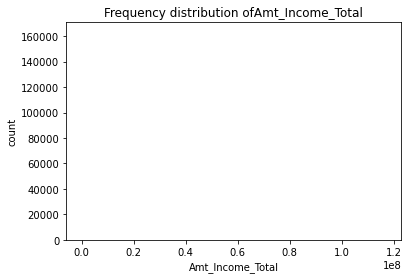

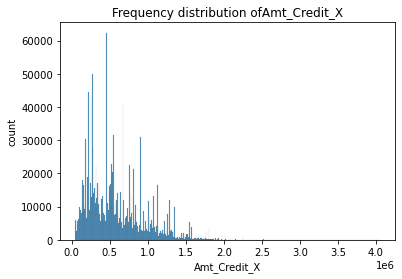

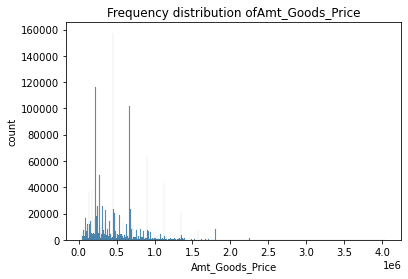

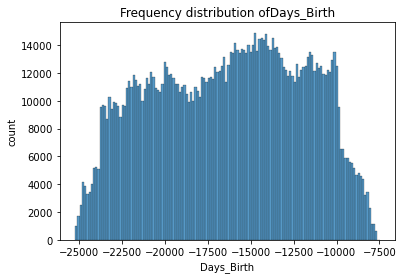

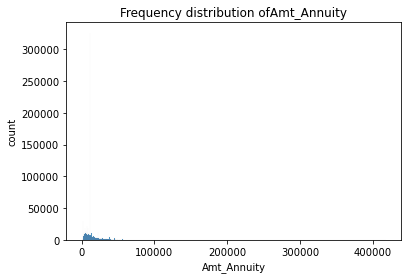

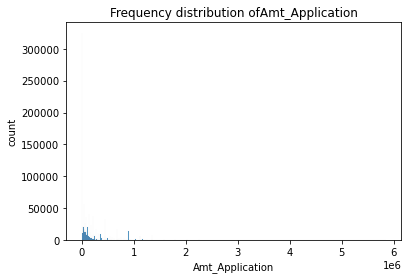

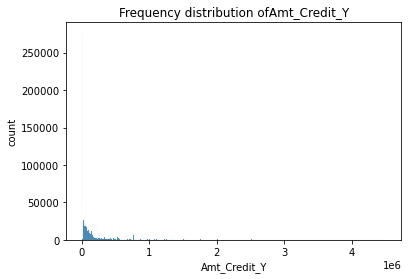

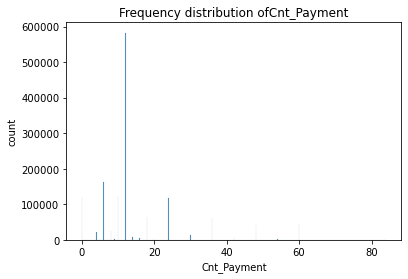

In [51]:
for i in cont_cols:
    sns.histplot(df[i])
    plt.xlabel(i.title())
    plt.ylabel("count")
    plt.title("Frequency distribution of" + i.title())
    plt.show()

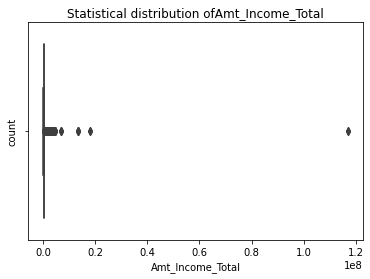

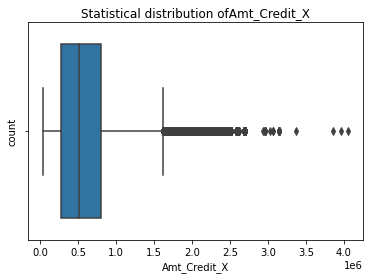

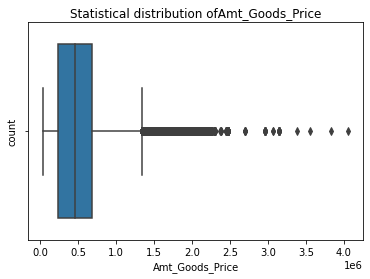

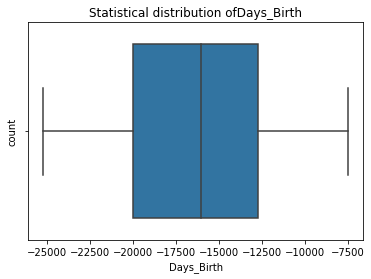

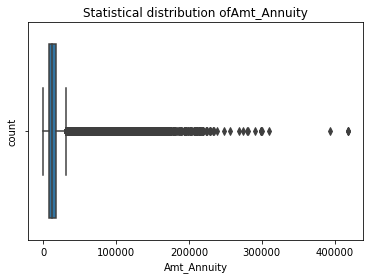

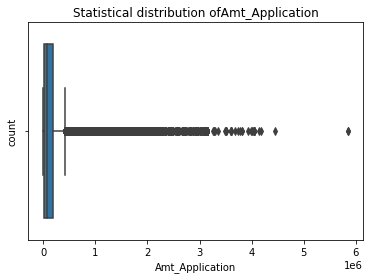

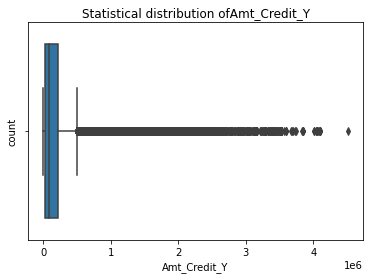

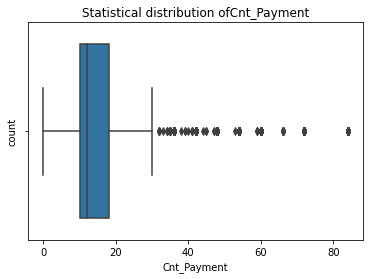

In [52]:
#BOXPLOT
for i in cont_cols:
    sns.boxplot(df[i])
    plt.xlabel(i.title())
    plt.ylabel("count")
    plt.title("Statistical distribution of" + i.title())
    plt.show()

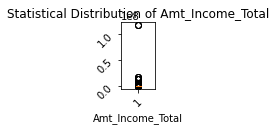

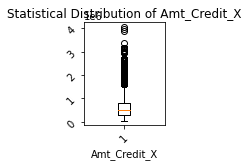

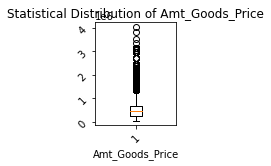

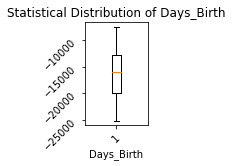

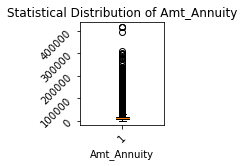

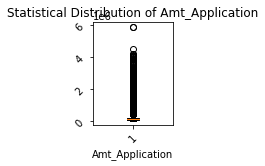

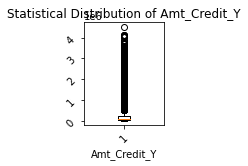

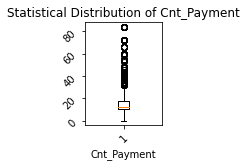

In [53]:
#SUBPLOT
plt.figure(figsize=(3,3))
pos=1
for i in cont_cols:
    plt.subplot(2,4,pos)
    plt.boxplot(df[i])
    plt.xlabel(i.title())
    plt.title("Statistical Distribution of " +i.title())
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    pos=pos+1
    plt.tight_layout()#avoids overlapping
    plt.show()

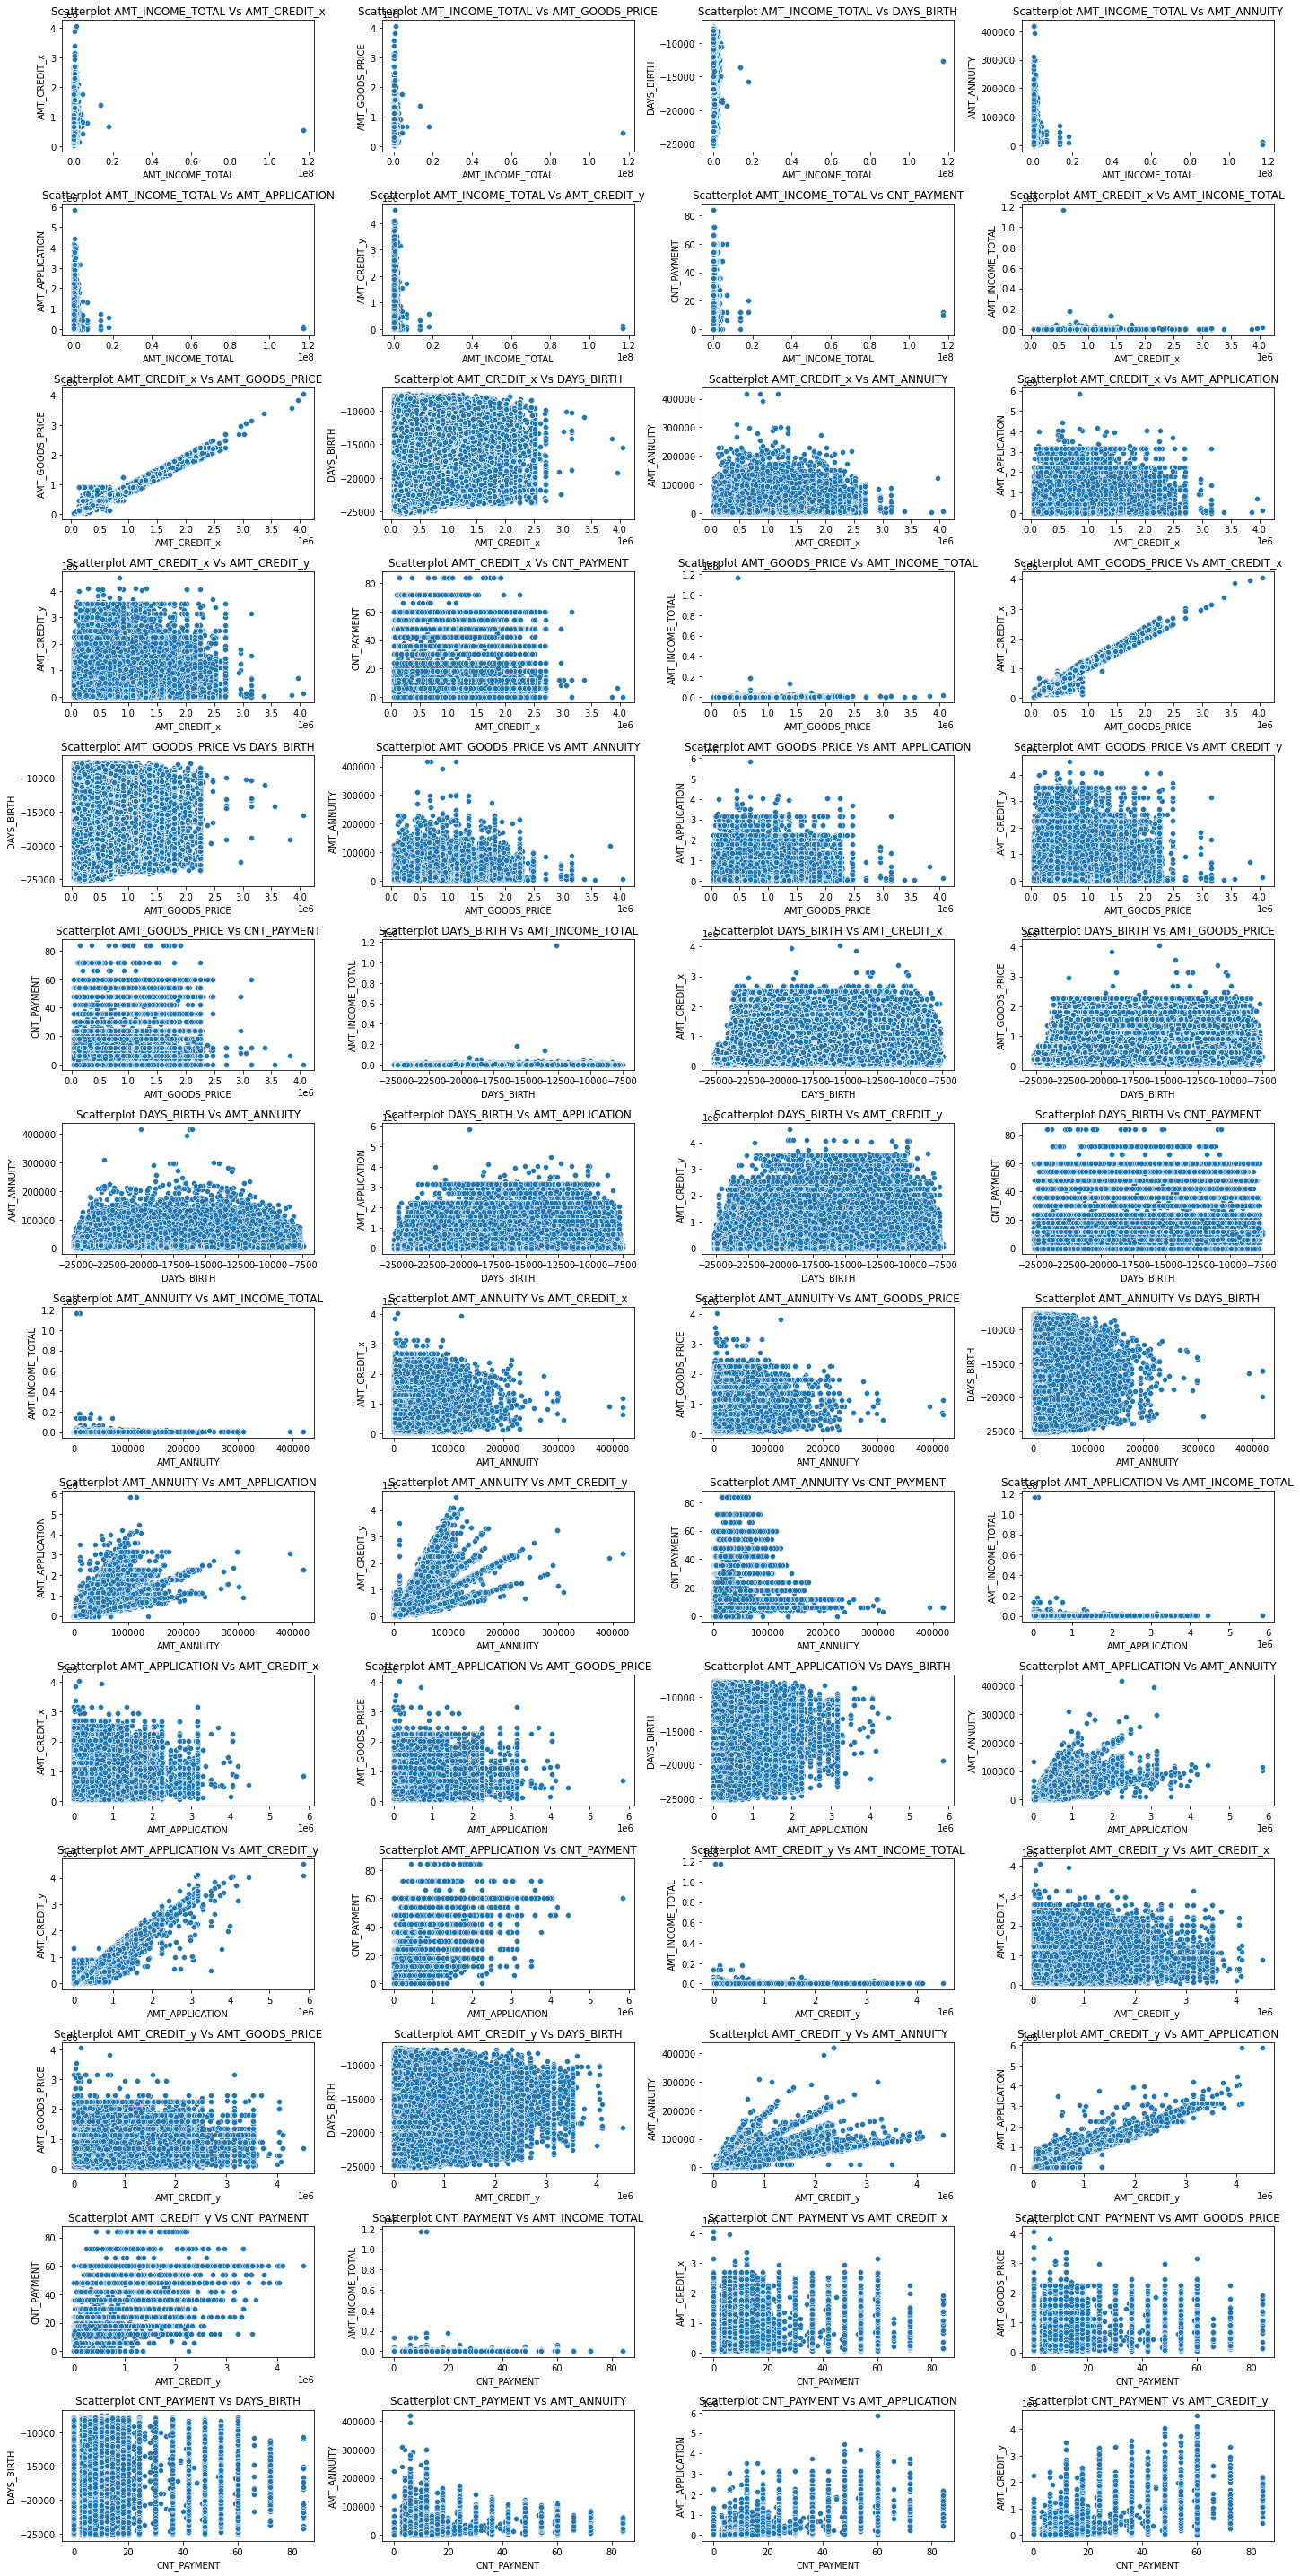

In [68]:
#SCATTERPLOT

pos=1
plt.figure(figsize=(20,40))
for x in cont_cols:
    for y in cont_cols:
        if x!=y:
            plt.subplot(14,4,pos)
            sns.scatterplot(df[x],df[y])
            plt.title("Scatterplot "+x+" Vs "+y)
            pos=pos+1
plt.tight_layout()
plt.show()

In [ ]:
plt.scatter(age,salary)
plt.show()


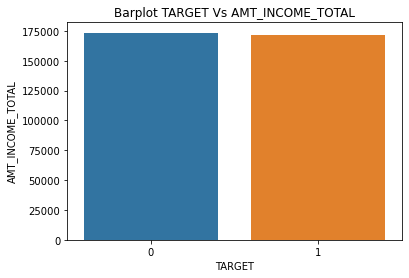

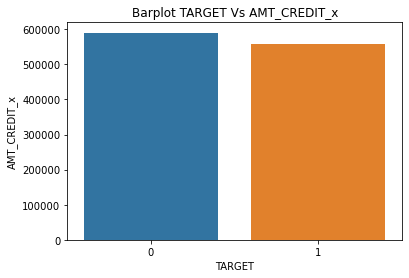

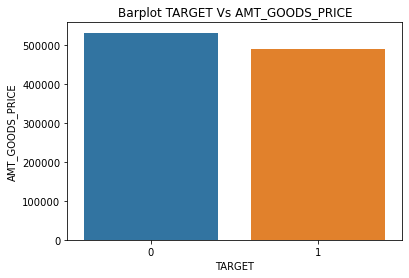

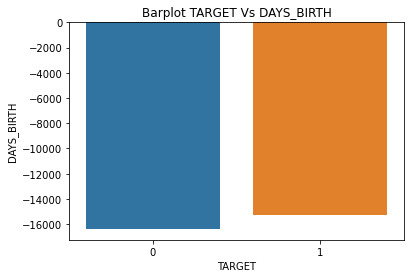

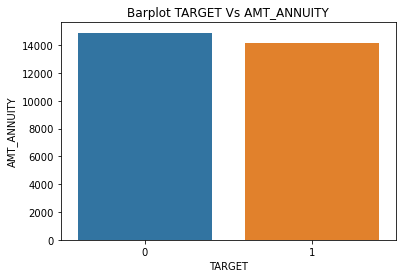

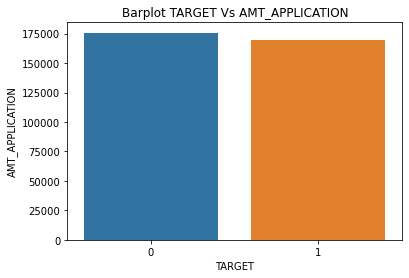

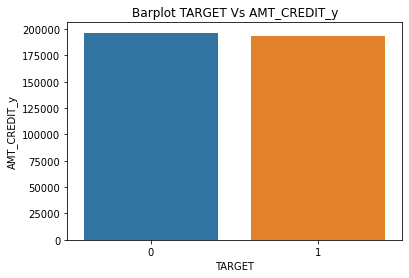

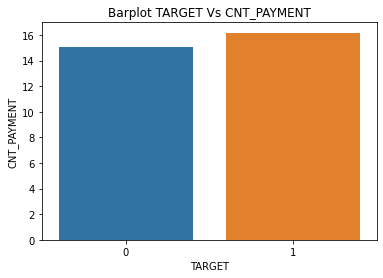

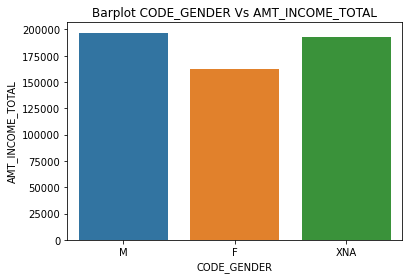

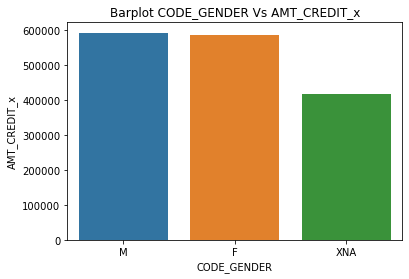

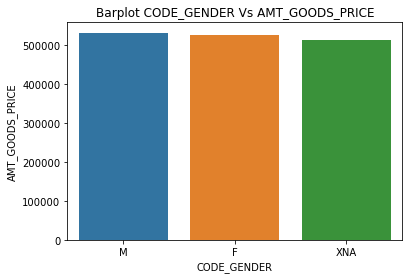

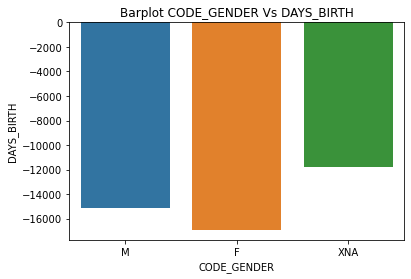

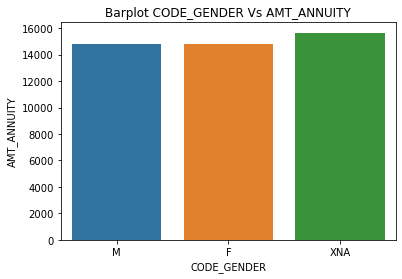

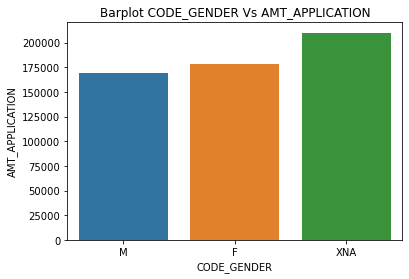

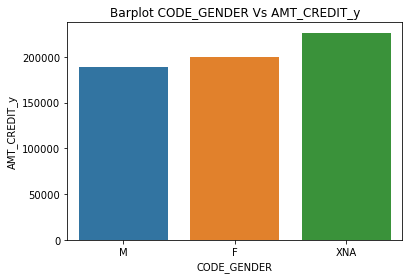

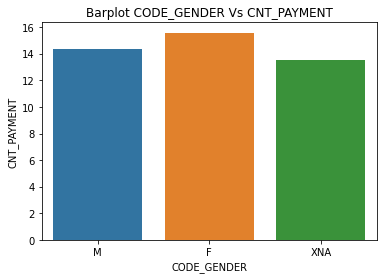

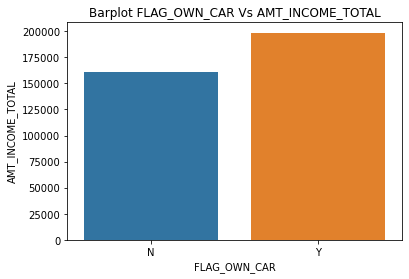

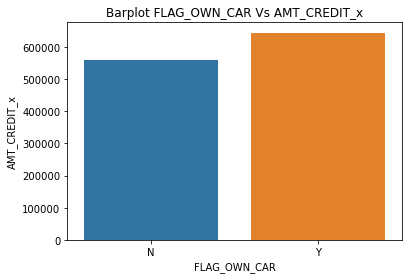

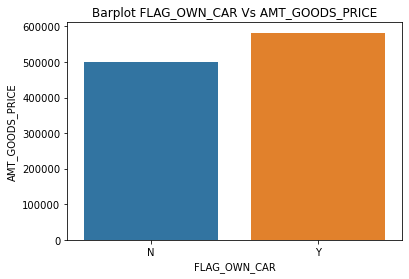

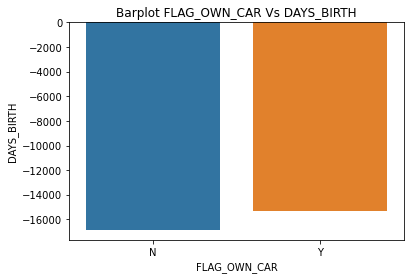

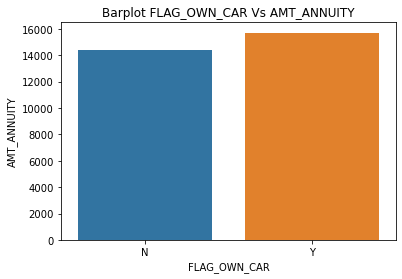

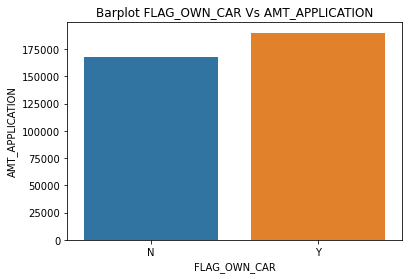

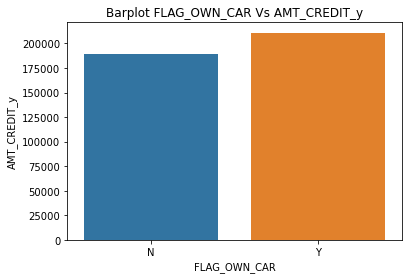

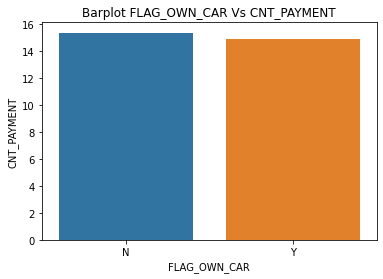

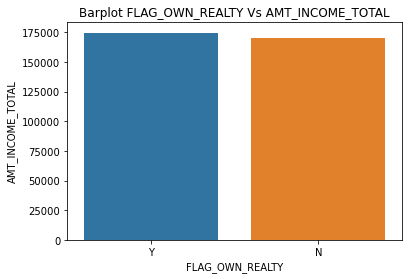

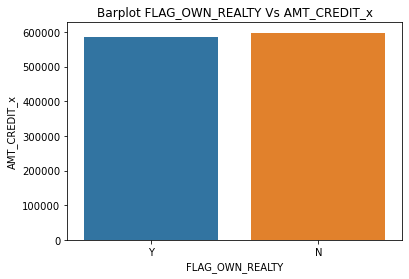

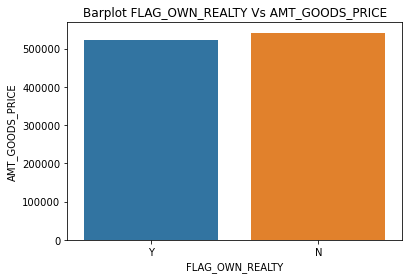

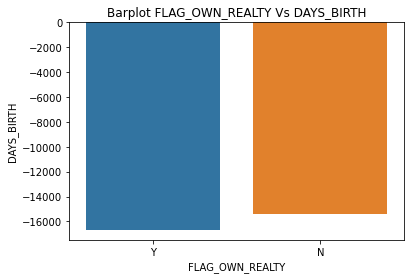

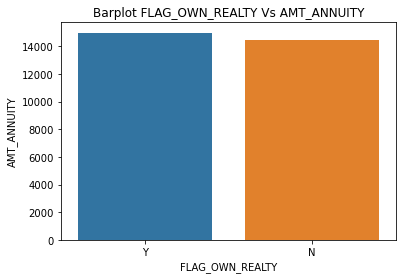

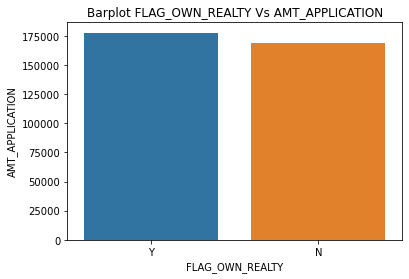

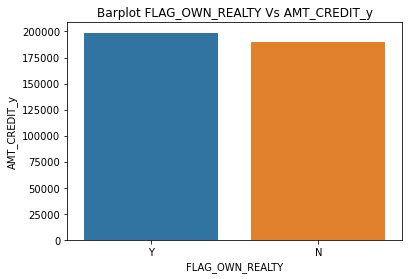

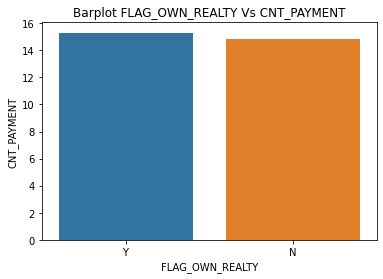

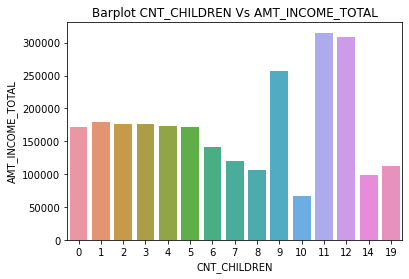

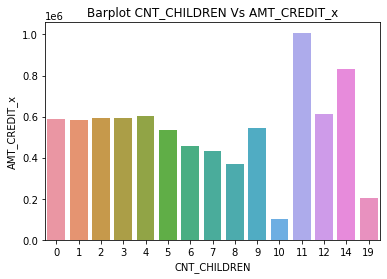

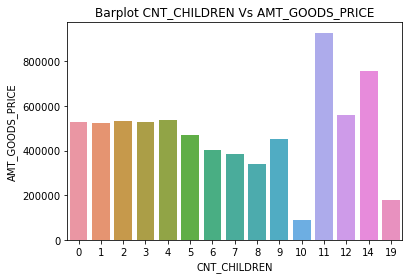

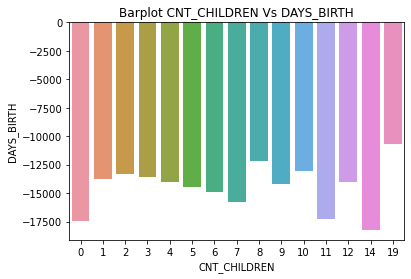

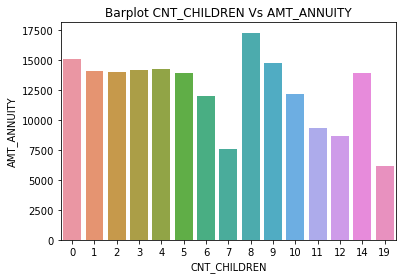

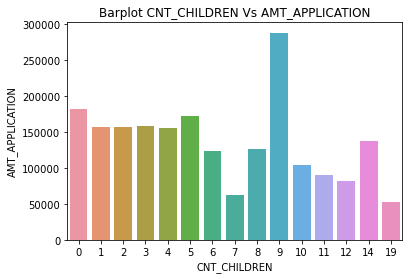

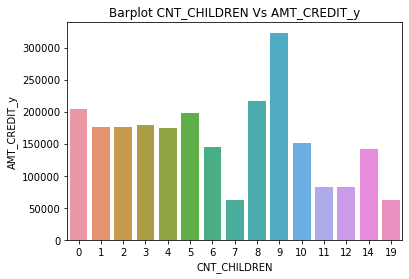

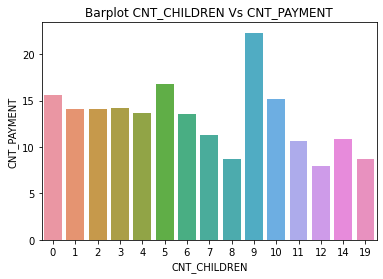

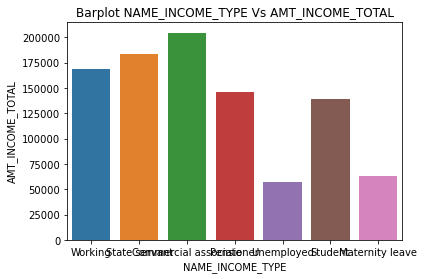

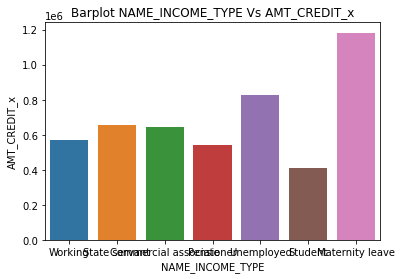

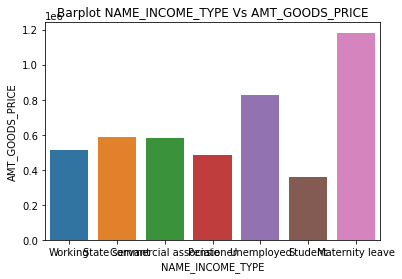

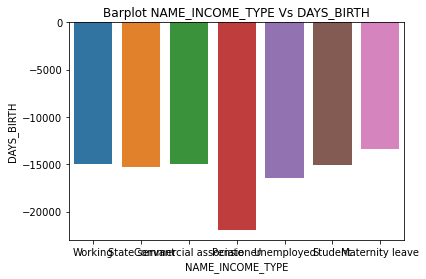

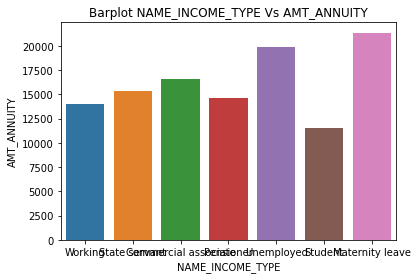

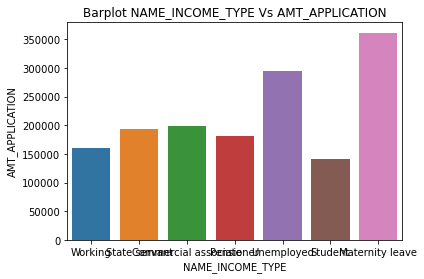

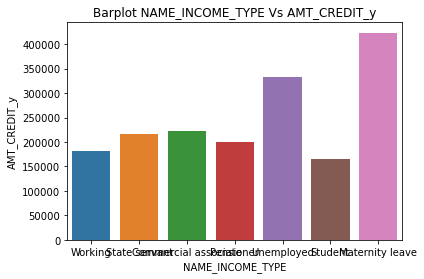

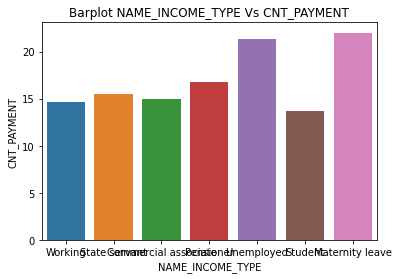

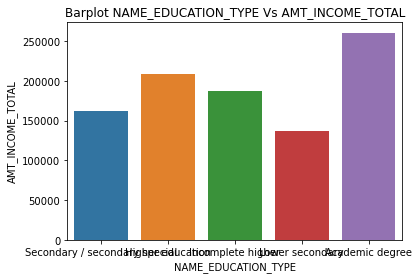

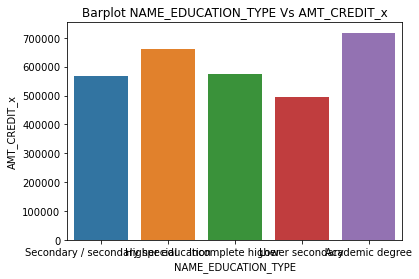

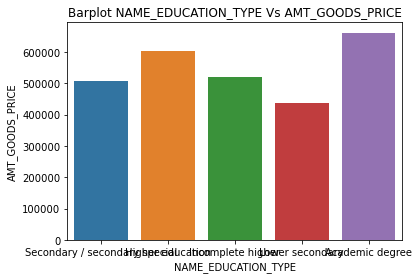

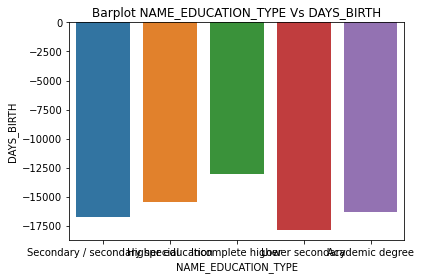

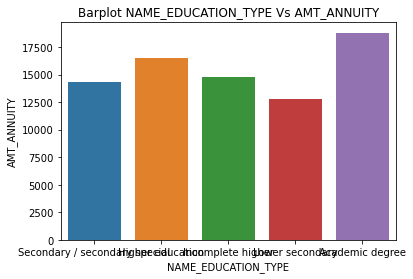

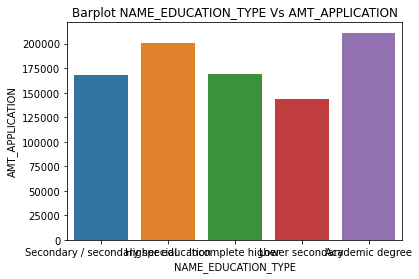

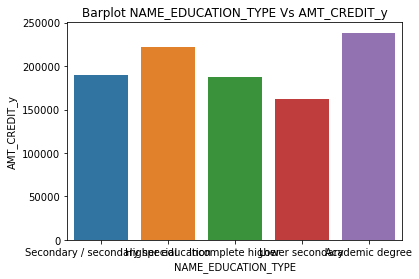

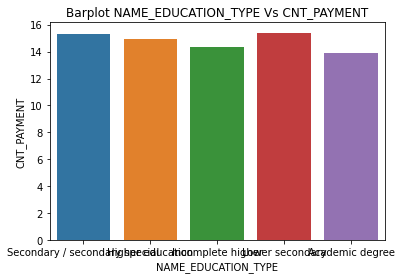

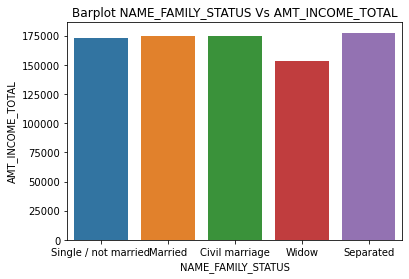

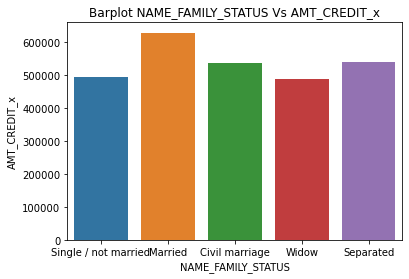

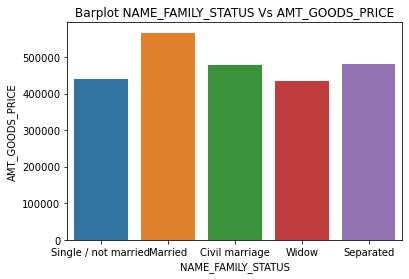

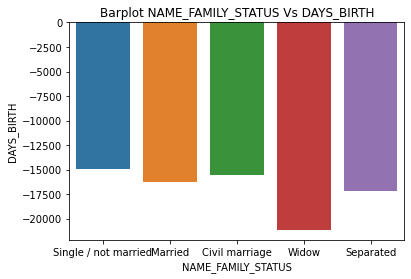

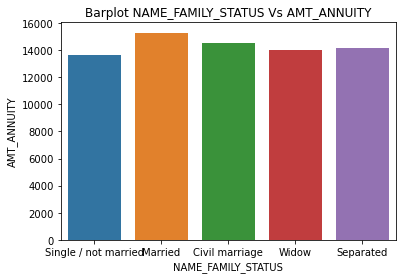

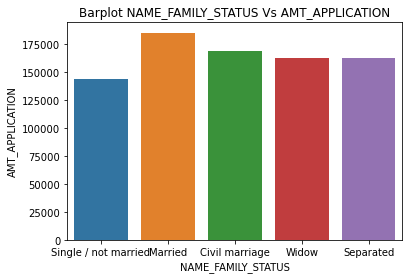

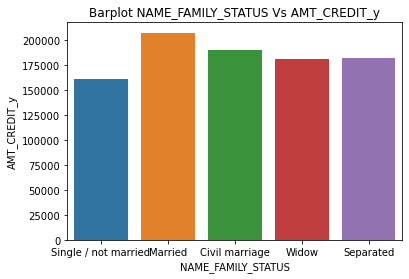

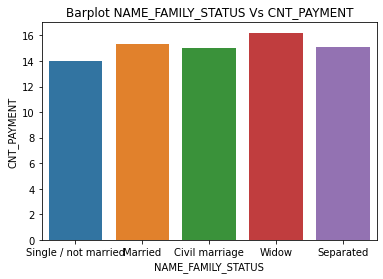

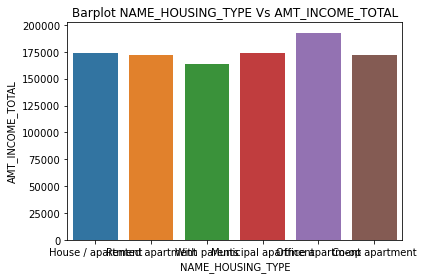

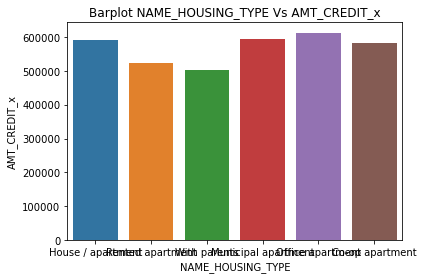

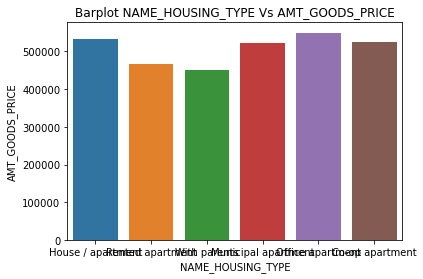

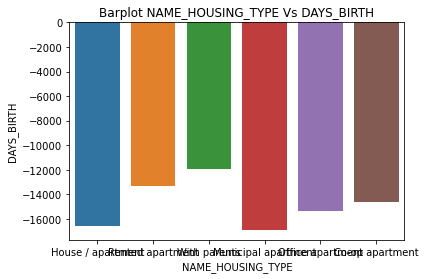

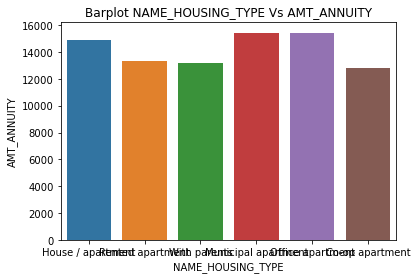

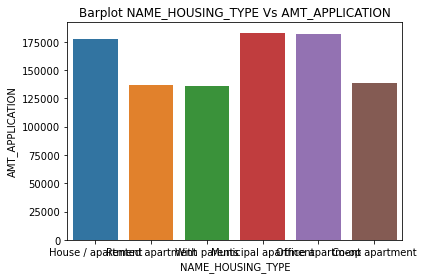

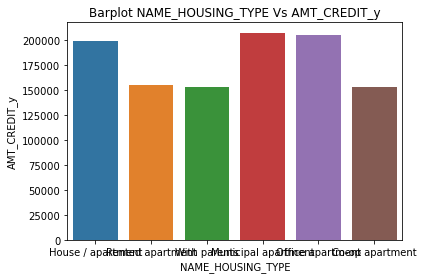

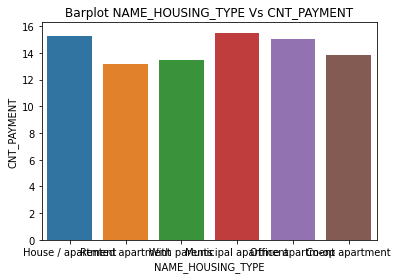

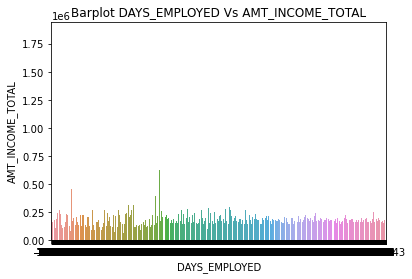

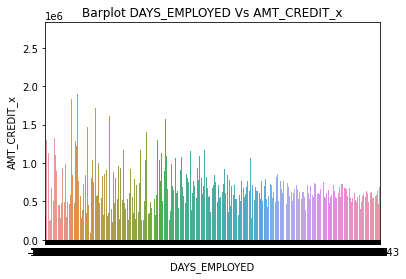

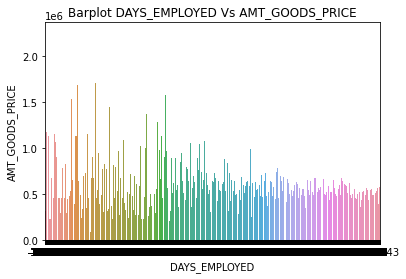

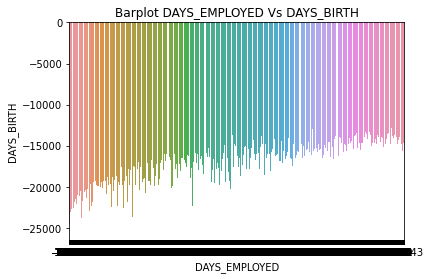

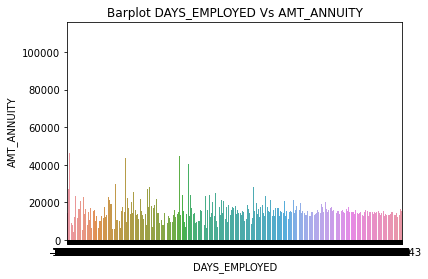

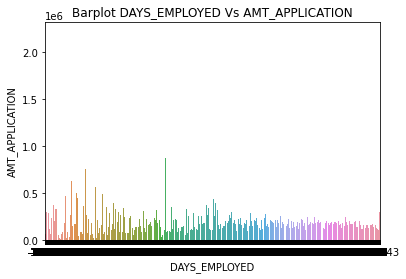

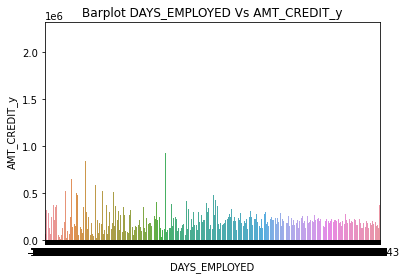

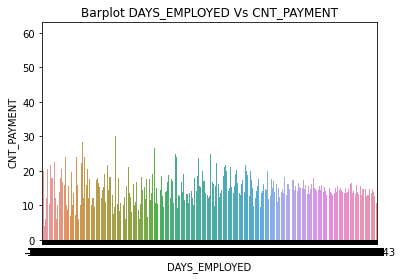

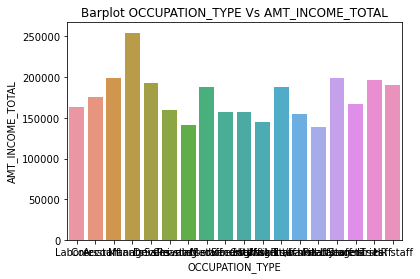

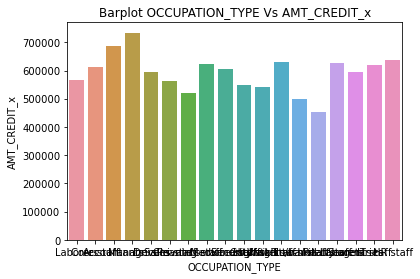

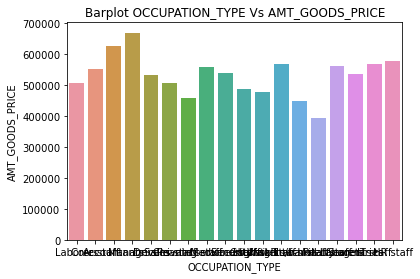

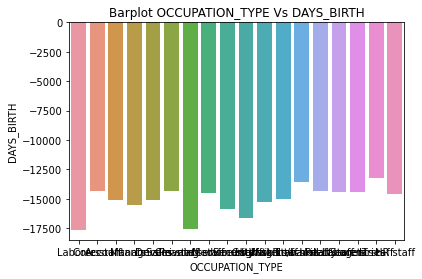

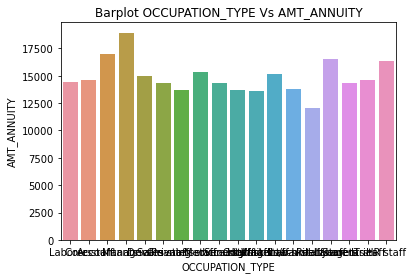

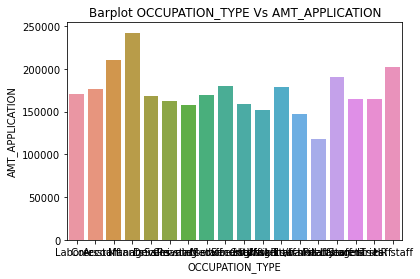

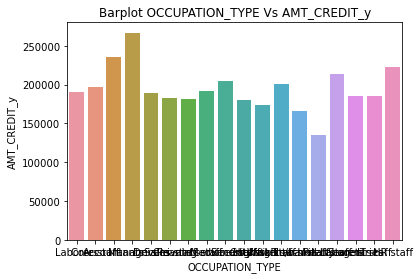

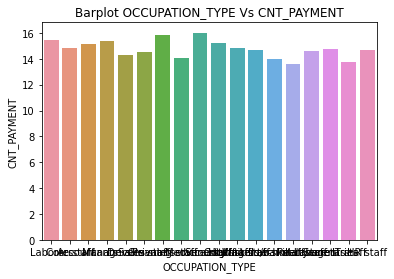

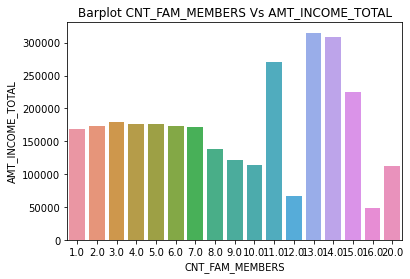

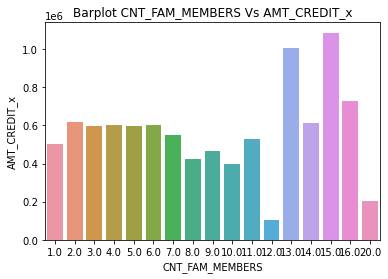

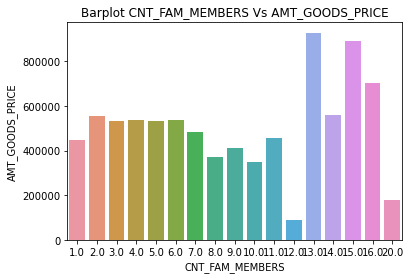

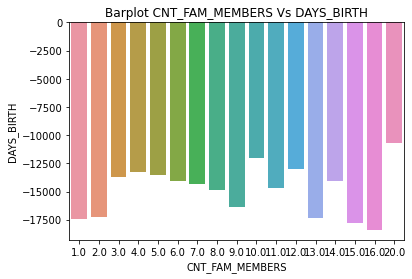

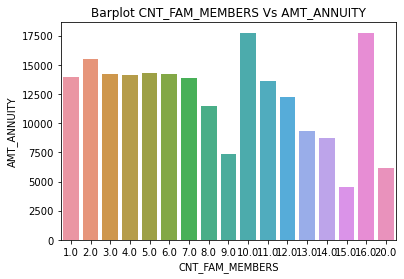

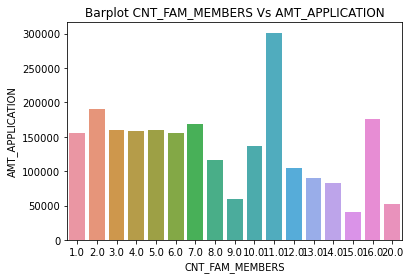

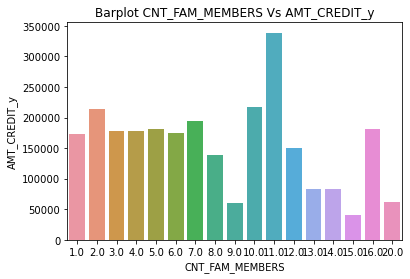

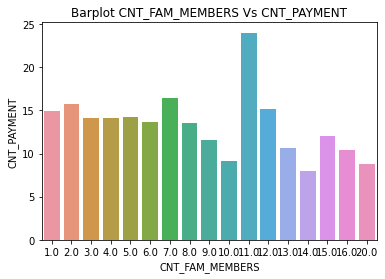

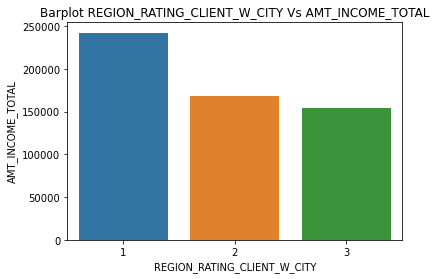

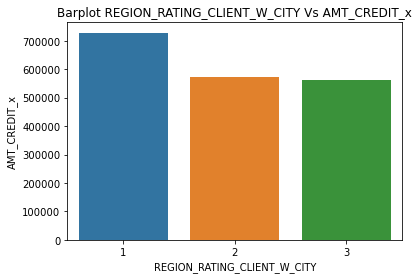

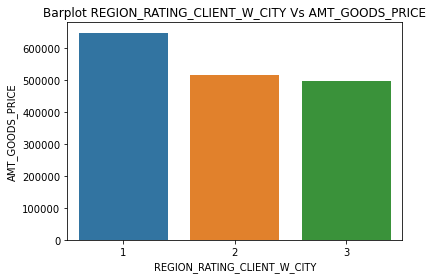

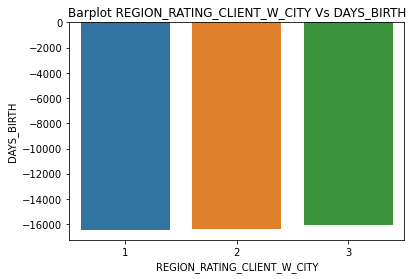

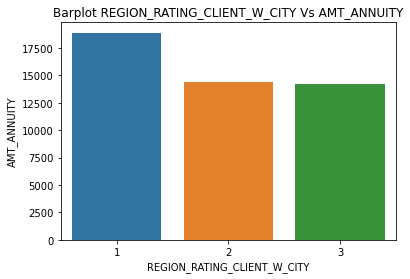

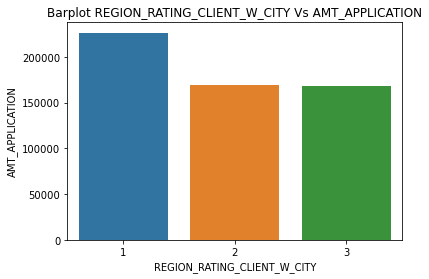

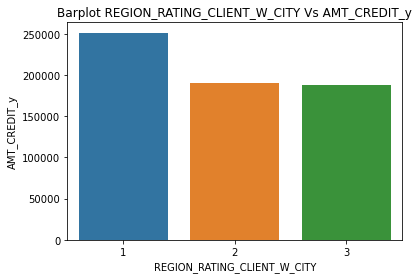

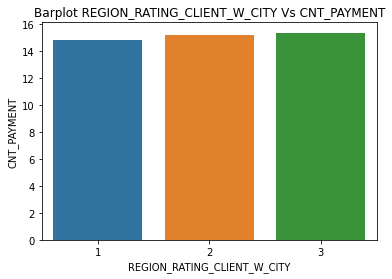

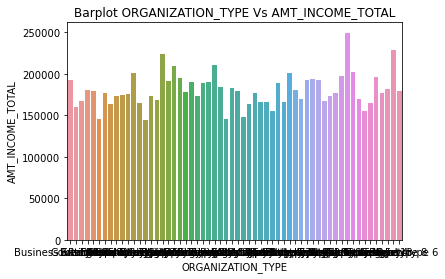

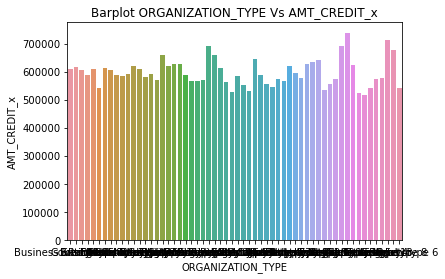

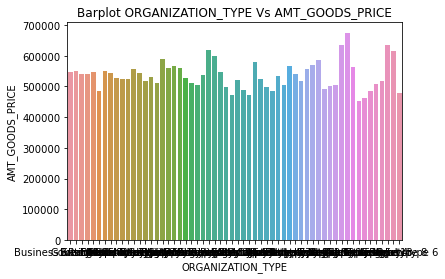

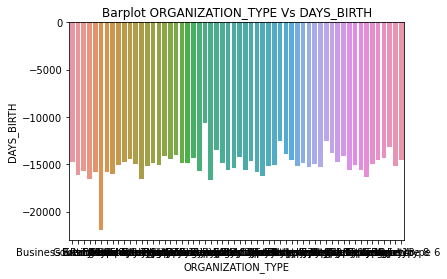

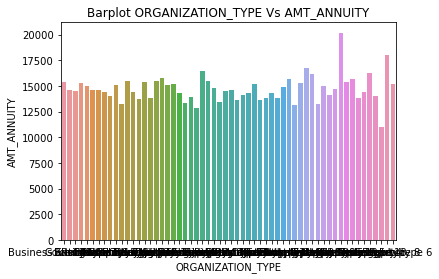

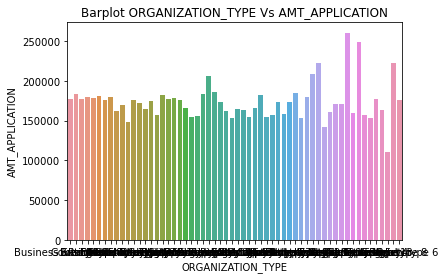

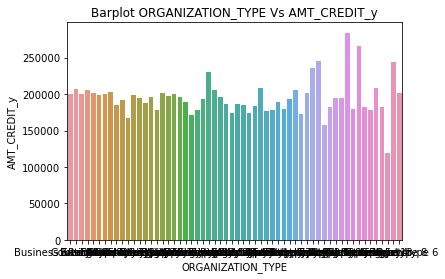

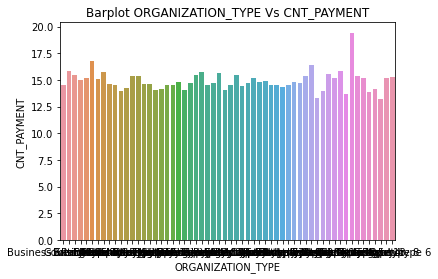

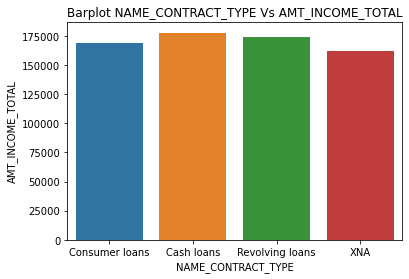

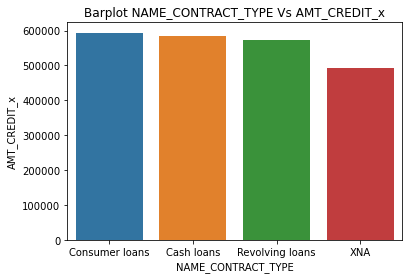

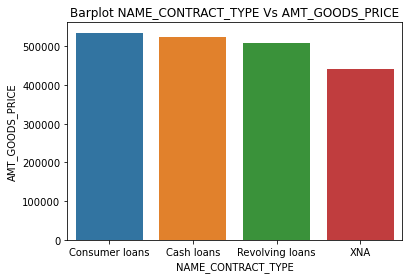

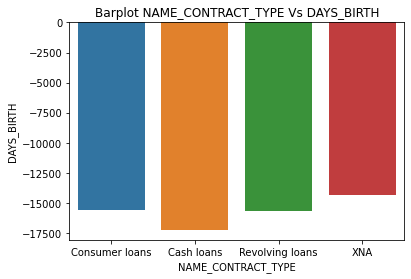

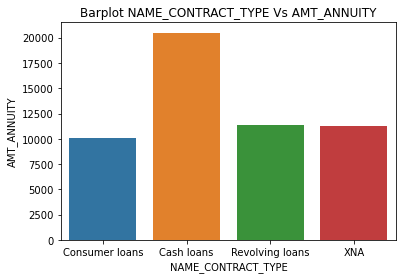

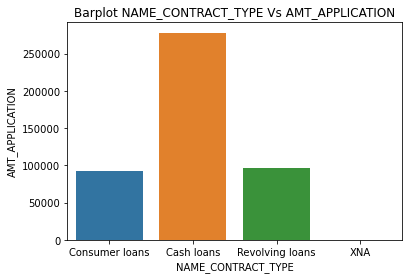

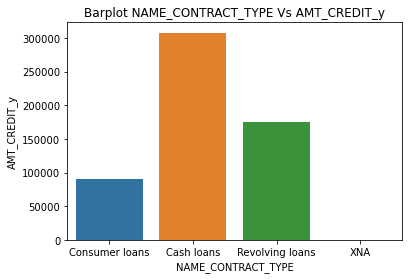

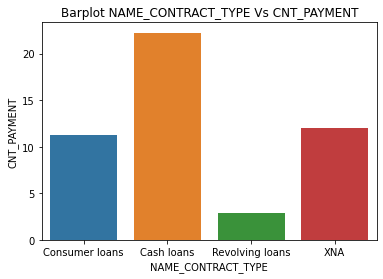

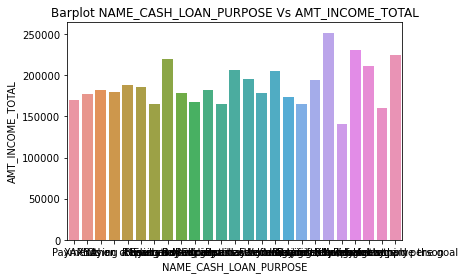

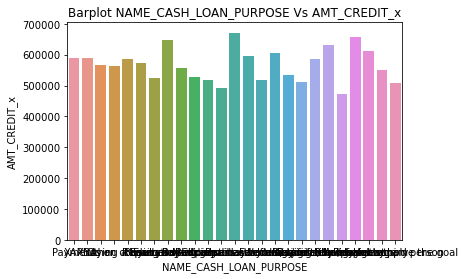

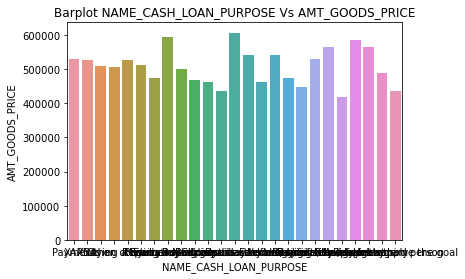

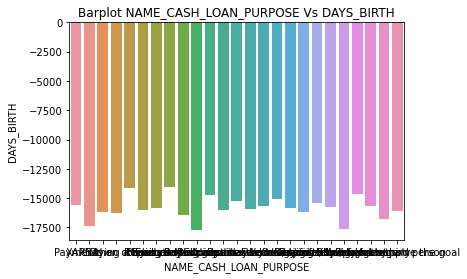

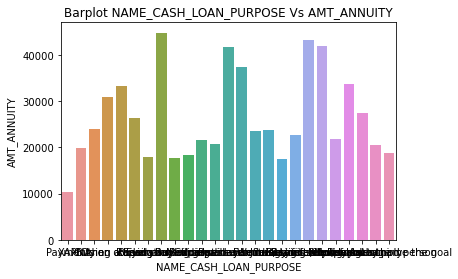

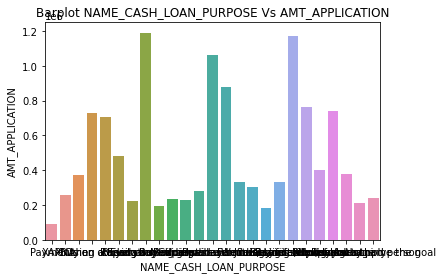

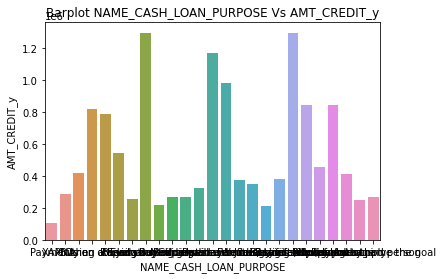

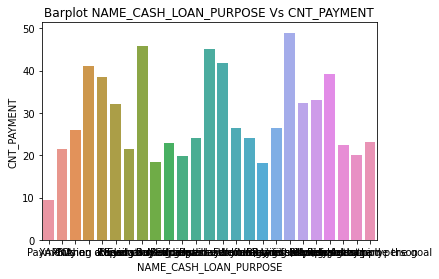

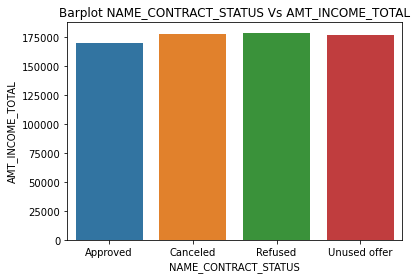

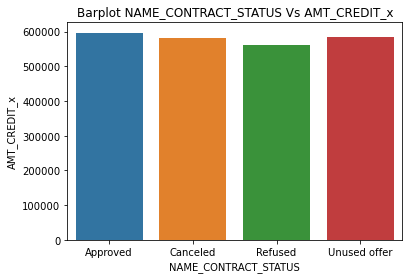

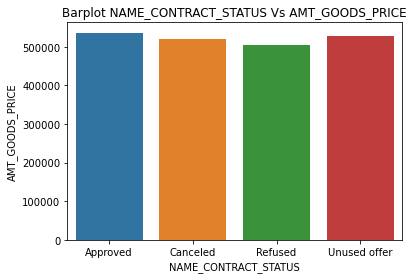

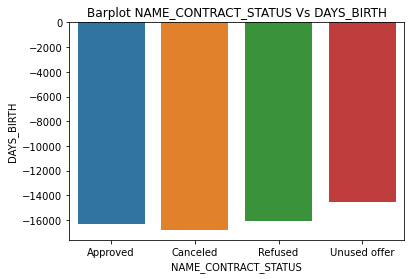

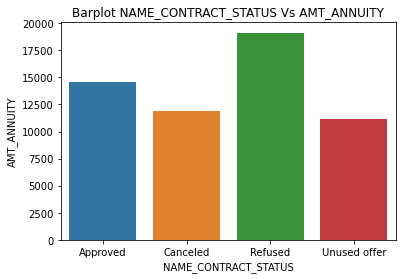

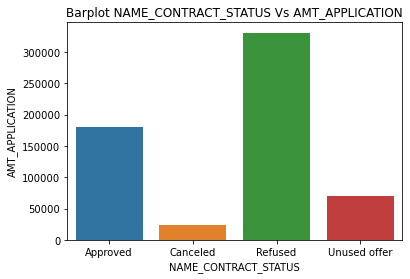

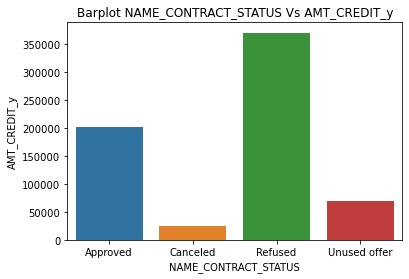

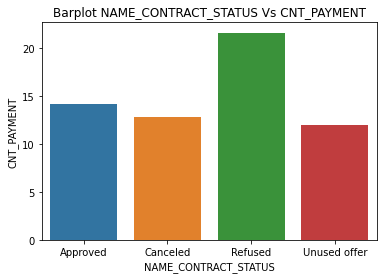

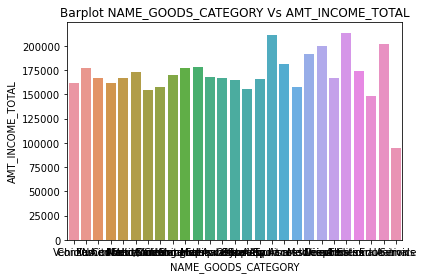

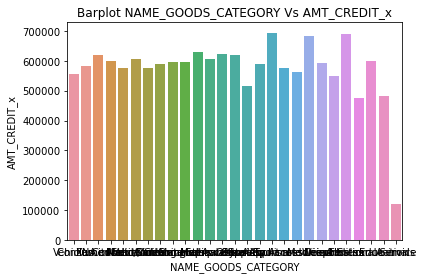

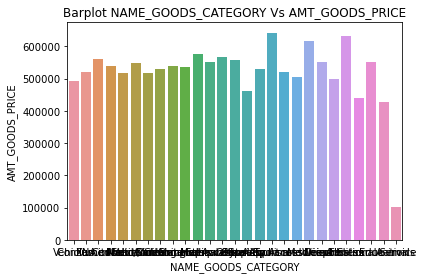

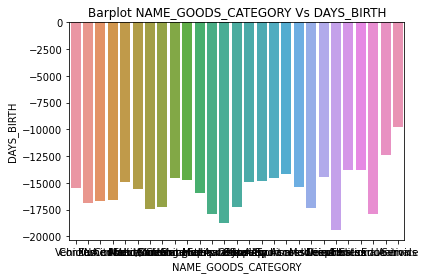

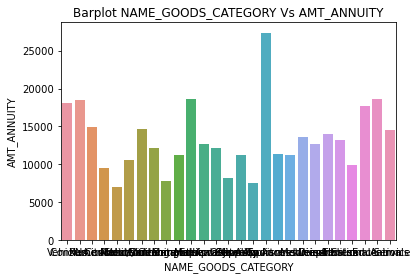

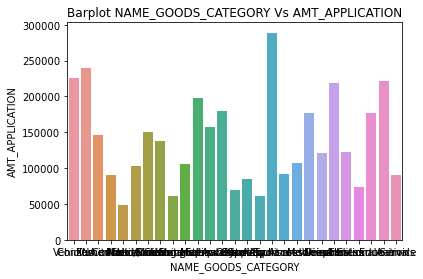

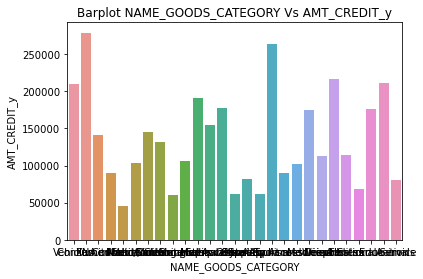

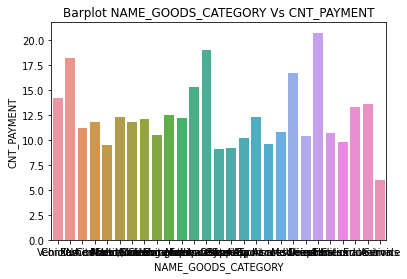

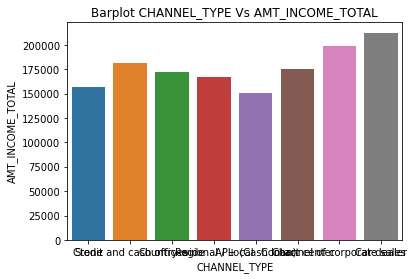

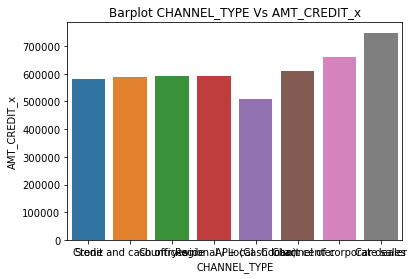

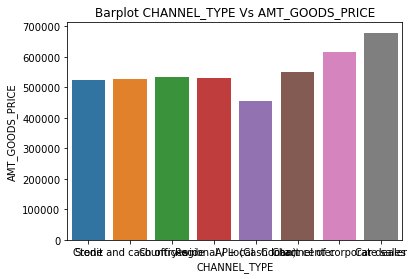

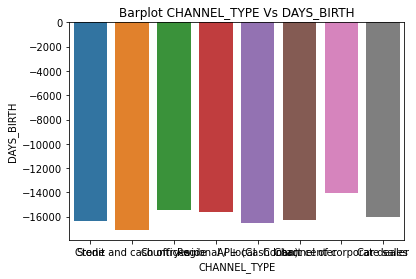

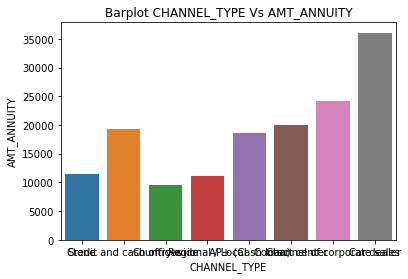

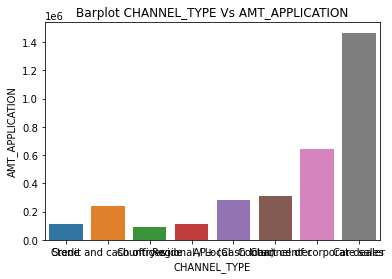

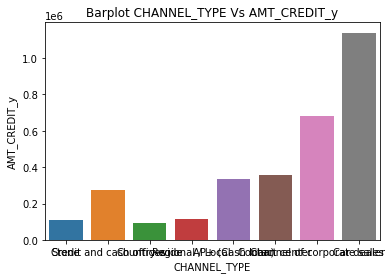

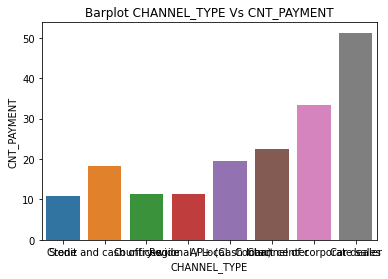

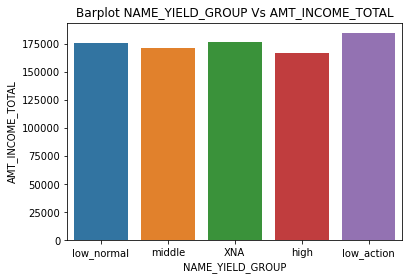

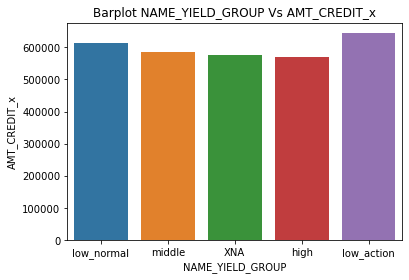

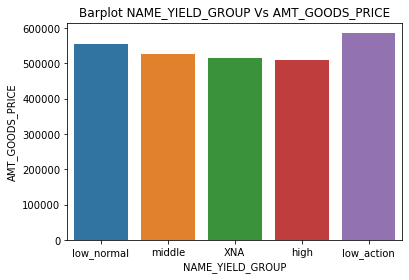

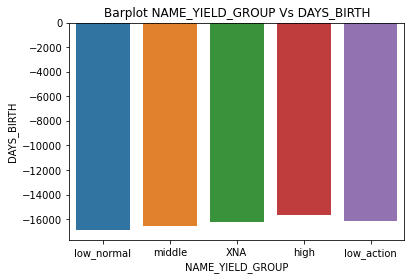

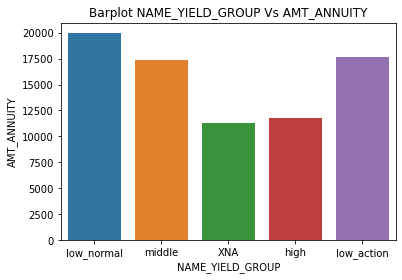

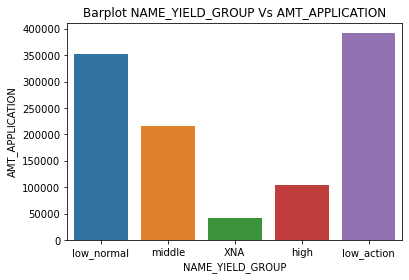

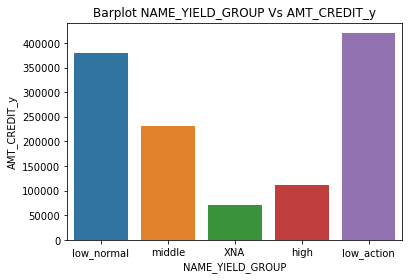

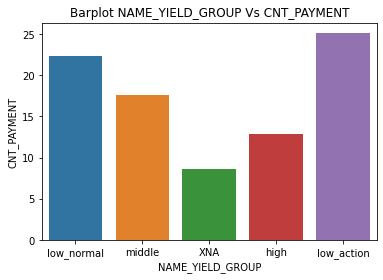

In [55]:
#BARPLOT
for x in cat_cols:
    for y in cont_cols:
        sns.barplot(df[x],df[y],ci=None)
        plt.title("Barplot "+x+" Vs "+y)
        plt.show()




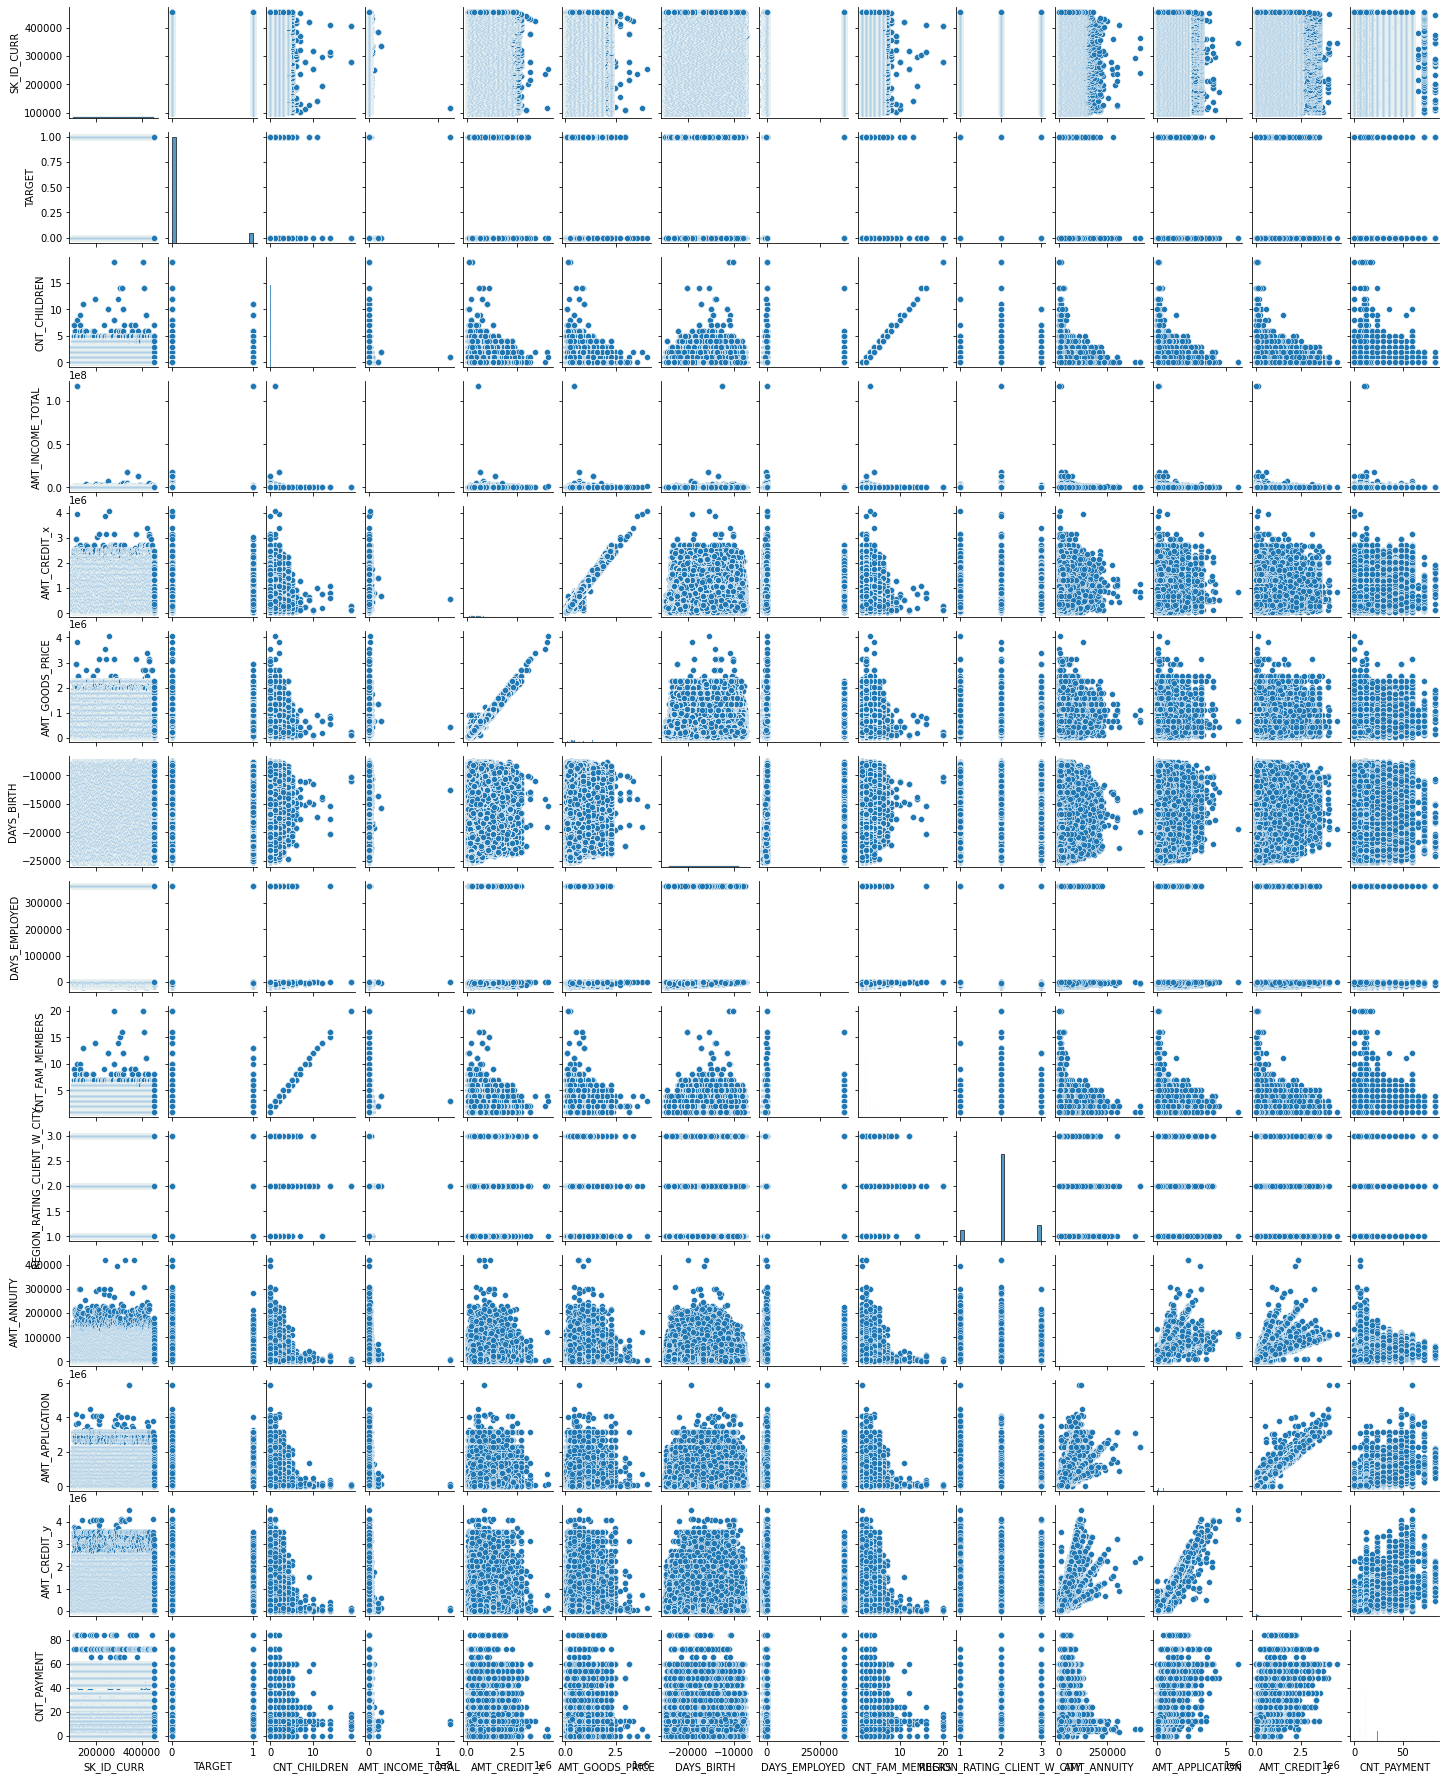

In [56]:
#PAIRPLOT

p=sns.pairplot(df)
p.fig.set_figheight(25)
p.fig.set_figwidth(20)


<AxesSubplot:>

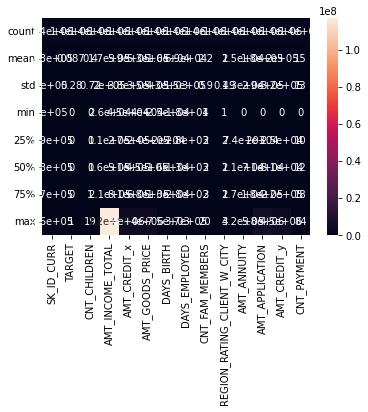

In [54]:
#HEATMAP

sns.heatmap(arr,annot=True)
## correlation matrix